<a href="https://colab.research.google.com/github/eosinchen/PythonCode/blob/master/Fibonacci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 提升演算法的精實與效率-以費式數列為例(包含實作)
# 費式數列，定義如下：

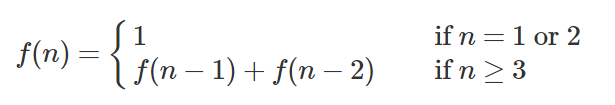

https://zh.wikipedia.org/wiki/%E6%96%90%E6%B3%A2%E9%82%A3%E5%A5%91%E6%95%B0

# Lesson 1：
使用遞迴演算法，如數列的定義，直接寫成 return 的內容值<br>
並利用 Timer 來計算時間<br>
以下範例為計算 f(8) 所需的時間<br><br>

時間複雜度 O(n)=2的n次方


In [ ]:
def fibonacci(n):
  assert(n >= 0), 'n must be >= 0'
  return n if n in (0, 1) else fibonacci(n-1) + fibonacci(n-2)

if __name__ == '__main__':
  from timeit import Timer
  t = Timer('fibonacci(10)', 'from __main__ import fibonacci')
  print(t.timeit())
  print(fibonacci(10))

# Lesson 2：
遞迴中的迴圈，While True...<br>
節省做了哪些事？<br>
其時間複雜度為？

In [ ]:
def fibonacciWithLoop(n):
  assert(n >= 0), 'n must be >= 0'

  if(n>1):
    result = 1
    while True:
      result = result + fibonacciWithLoop(n-2)
      n = n - 1
      if(n==1):
        break
    return result

  return n

if __name__ == '__main__':
  from timeit import Timer
  t = Timer('fibonacciWithLoop(10)', 'from __main__ import fibonacciWithLoop')
  print(t.timeit())
  print(fibonacciWithLoop(10))

# Lesson 3：
遞迴中，有多少次的重工？<br>
將每次的結果記錄下來，以便下次使用<br>
時間複雜度，是否會變成線性？<br>

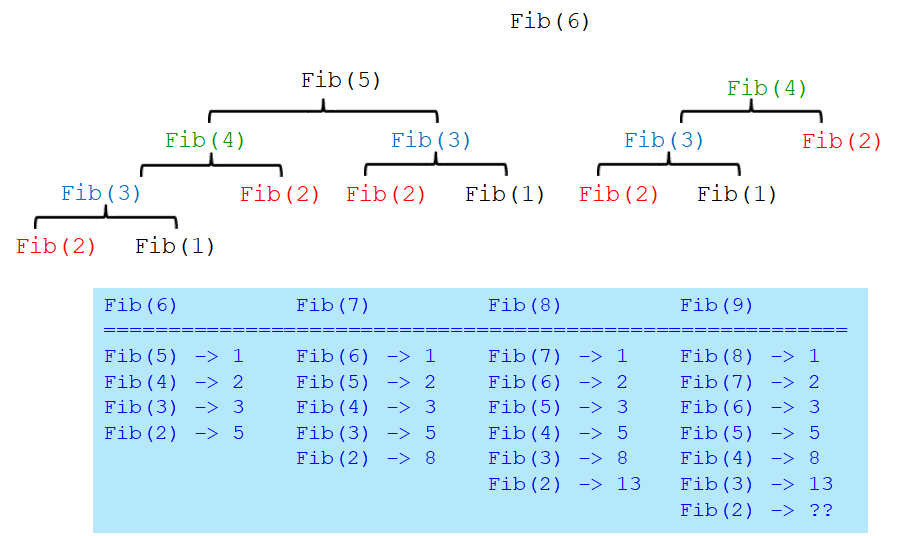

In [ ]:
result_dict = {0:0, 1:1}

def fibonacciWithDict(n):
  assert(n >= 0), 'n must be >= 0'

  if(n in result_dict):
    return result_dict[n]
 
  res = fibonacciWithDict(n-1) + fibonacciWithDict(n-2)
  result_dict[n] = res
  return res

if __name__ == '__main__':
  from timeit import Timer
  t = Timer('fibonacciWithDict(500)', 'from __main__ import fibonacciWithDict')
  print(t.timeit())
  print(fibonacciWithDict(500))

# Lesson 4：
Lesson 3 中，加入 result_dict 可以記錄每個數列的值，但<br>
**也破壞了遞迴的完整性**<br>
比如：想要知道f(100)的前20項之總合，或是第30-50的總和<br>
是否就持續的加入不同的 sum list 呢？<br><br>
使用設計模式(Design Patterns)的裝飾器模式(Decorator)，在不修改原有程式碼的情況下，進行功能的加強與執行方式<br>
https://zh.wikipedia.org/wiki/%E4%BF%AE%E9%A5%B0%E6%A8%A1%E5%BC%8F


In [ ]:
import functools
 
def memoize(fn):
  cache = dict()
 
  @functools.wraps(fn)
  def memoizer(*args):
    if args not in cache:
      cache[args] = fn(*args)
    return cache[args]
 
  return memoizer
    
@memoize 
def number_sum(n):
  '''Returns the sum of the first n numbers''' 
  assert(n >= 0), 'n must be >= 0' 
  if n == 0:
    return 0
  else:
    return n + number_sum(n-1)
 
@memoize 
def fibonacci(n):
  '''Returns the suite of Fibonacci numbers''' 
  assert(n >= 0), 'n must be >= 0'
  if n in (0, 1):
    return n
  else:
    return fibonacci(n-1) + fibonacci(n-2)
        
def main():
  from timeit import Timer

  to_execute = [
      (number_sum, Timer('number_sum(300)', 'from __main__ import number_sum')),
      (fibonacci, Timer('fibonacci(10)', 'from __main__ import fibonacci'))    
  ]
    
  for item in to_execute:
    fn = item[0]
    print(f'Function "{fn.__name__}": {fn.__doc__}')
    t = item[1]
    print(f'Time: {t.timeit()}')
    print()

if __name__ == '__main__': 
  main()
